# Decision trees

A nonparametric model.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from utils import plot_decision

## Load and prep the data

In [2]:
# load the iris data
df = pd.read_csv('data/iris.csv')
df['species_label'], _ = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
# select features
y = df['species_label']
X = df[['petal_length', 'petal_width']]

In [4]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

## Train the model and make predictions

Note we didn't have to standardize the data to use a decision tree.

In [5]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [6]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

## Evaluate the model's performance

Including the tree's axis-parallel decision boundaries and how the tree splits

In [7]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 0.98


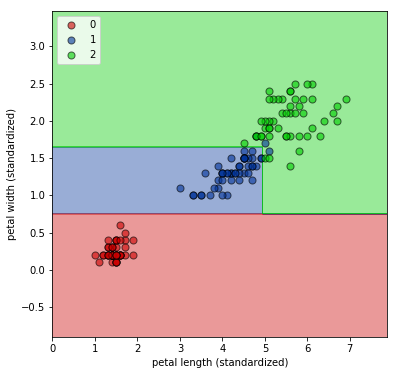

In [8]:
# visualize the model's decision regions to see how it separates the samples
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined, y=y_combined, classifier=dtree)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

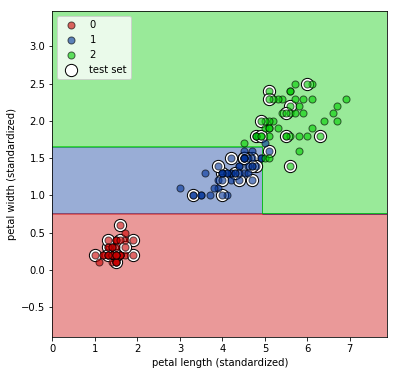

In [9]:
# same thing, but this time identify the points that constituted the test data set
test_idx = range(len(y_train), len(y_combined))
plot_decision(X=X_combined, y=y_combined, classifier=dtree, test_idx=test_idx)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

Now visualize how the tree splits using [GraphViz](http://www.graphviz.org/) (make sure you install it first):

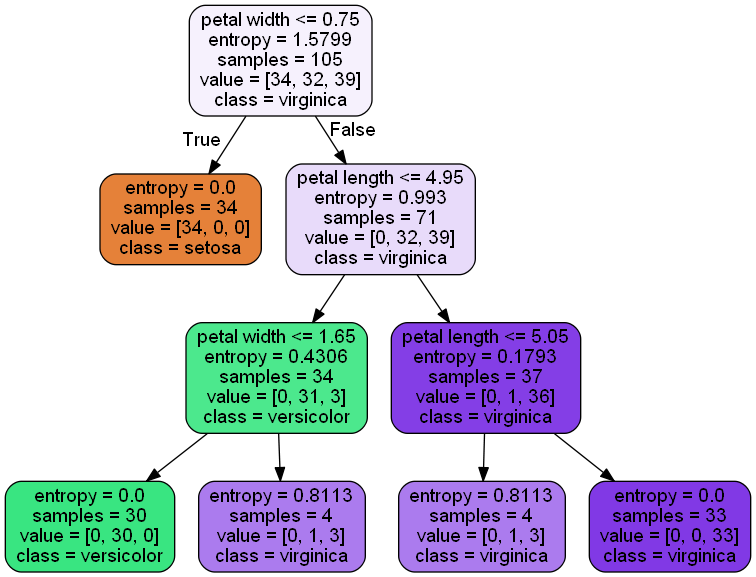

In [10]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['petal length', 'petal width'],  
                                class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))